In [1]:
# Add lib input sys.path
import os
import sys
import time

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial
import h5py
from scipy.spatial import distance

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from matplotlib.colors import ListedColormap
import libs.linear_models as lm
import libs.data_util as data
import libs.nn as nn
import libs.plot as myplot

%matplotlib inline

#### Exercise 8.1

* (a) If there's such a hyperplane that can tolerate noise radius greater than $\frac{1}{2}|x_{+}-x_{-}|$, we draw a line between two points, for $(x_{+}, +1)$, we can pick a point on the line that just pass the middle point between $x_{+}$ and $x_{-}$ and still within the radius (which is greater than $\frac{1}{2}|x_{+}-x_{-}|$) of $x_{+}$. This point will have label $+1$. However, it's obviously also in the radius of $x_{-}$, so it shall have a label of $-1$ as well. It is impossible to classify such point. This thus contradicts the fact that a hyperplane exists to tolerate such a noise radius. Our assumption is wrong, there's no such hyperplane that can tolerate noise radius greater than $\frac{1}{2}|x_{+}-x_{-}|$.

* (b) We can choose the hyperplane that perpendicular to the line between $x_{+}$ and $x_{-}$ and passes through the middle point. The two balls with radius of $\frac{1}{2}|x_{+}-x_{-}|$ and centered at $x_{+}, x_{-}$ are separated by this hyperplane totally. The projection of any point in the ball of $x_{+}$ on the norm of the hyperplane is positive.

Thus the hyperplane can tolerate such a noise radius.

#### Exercise 8.2

* (a) 

\begin{align*}
Y\otimes (Xw + b) &= Y \otimes ( \begin{bmatrix}0 \\ -4 \\ 2.4\end{bmatrix}-0.5)\\
&= \begin{bmatrix}-1 \\ -1 \\ +1\end{bmatrix} \otimes \begin{bmatrix}-0.5 \\ -4.5 \\ 1.9\end{bmatrix}\\
&= \begin{bmatrix}0.5\\ 4.5 \\ 1.9\end{bmatrix}\\
\end{align*}

So $\rho = \min y_n(w^Tx_n +b) = 0.5$

* (b) So we have the new weights $w' = \frac{1}{\rho}(b,w) = (-1, \begin{bmatrix}2.4 \\ -6.4 \end{bmatrix})$

We compute

\begin{align*}
Y\otimes (Xw' + b) &= Y \otimes ( \begin{bmatrix}0 \\ -8 \\ 4.8\end{bmatrix}-1)\\
&= \begin{bmatrix}-1 \\ -1 \\ +1\end{bmatrix} \otimes \begin{bmatrix}-1 \\ -9 \\ 3.8\end{bmatrix}\\
&= \begin{bmatrix}1\\ 9 \\ 3.8\end{bmatrix}\\
\end{align*}

The new minimum is $\rho' = 1$ which satisfies equation (8.2)

* (c) It's easy to see that the two hyperplanes are the same in 2-Dimensional space.


#### Exercise 8.3

If $h$ is the optimal hyperplane, its $w_h$ minimizes $w^Tw$. Also, for a separating hyperplane, the data point that is nearest to the hyperplance has distance $\frac{1}{|w_h|}$. Assume $\rho_{+} > \rho_{-}$, so we should have $\rho_{-} = \frac{1}{|w_h|}$. 

Let $l=\frac{\rho_{+}-\rho_{-}}{2}$, and $\rho'_{+} = \rho_{+} - l = \frac{\rho_{+}+\rho_{-}}{2} > \frac{1}{|w_h|}$, $\rho'_{-} = \rho_{-} + l = \frac{\rho_{+}+\rho_{-}}{2} > \frac{1}{|w_h|}$.

If we let $w' = \rho'_{+} = \rho'_{-}$, then we have $|w'| < |w_h|$, which contradicts the fact that $w_h$ minimizes $w^Tw$.


#### Exercise 8.4

Suppose $Y=\begin{bmatrix}y^1 & y^2 & \dots & y^N\end{bmatrix}$ and $X=\begin{bmatrix}1 & x^T_1 \\ \dots & \dots \\ 1 & x^T_N\end{bmatrix}$, where the columns of $Y$ is $y^n = \begin{bmatrix}0 \\ \dots \\ y_n \\ \dots \end{bmatrix}$, the only non-zero entry is at the $n$-th row with value of $y_n$.

We use column times row in matrix multiplication, so 

\begin{align*}
A &=YX \\
&= \sum^N_{n=1} \begin{bmatrix}0 \\ \dots \\ y_n \\ \dots \end{bmatrix} \begin{bmatrix}1 & x^T_n\end{bmatrix}\\
&= \sum^N_{n=1} \begin{bmatrix}0 & 0^T_d \\ \dots & \dots \\ y_n & y_nx^T_n \\ \dots & \dots \\ 0 & 0^T_d \end{bmatrix}\\
&= \begin{bmatrix}y_1 & y_1x^T_1 \\ \dots & \dots \\ y_n & y_nx^T_n \\ \dots & \dots \\ y_N & y_Nx^T_N \end{bmatrix}\\
\end{align*}

This is exactly the formula we are seeking for.

#### Exercise 8.5

It's clear that the eigenvalues of $Q$ are eigher 0 or 1, so we know $Q$ is positive semi-definite.

#### Exercise 8.6

In [58]:
def generate_data_84(N, x1_lb=0, x1_ub=1, x2_lb=-1, x2_ub=1):
    dim = 1
    max_v = 10000
    x1 = data.generate_random_numbers(N, dim, max_v, x1_lb, x1_ub)
    x2 = data.generate_random_numbers(N, dim, max_v, x2_lb, x2_ub)
    df = pd.DataFrame({'x1':x1.flatten(), 'x2':x2.flatten()})
    df['y'] = np.sign(df['x2'])
    return df

In [37]:
N = 20
N_t = 100
df = generate_data_84(N)
print(f"-- Number of positive points: {df.loc[df['y']>0]['y'].count()}")
X = df[['x1', 'x2']].values
y = df['y'].values
my_svm = lm.SVM()
my_svm.fit(X, y)
print(f"-- In-Sample Error: {my_svm.calc_error(X, y)}")
print(f"-- SVM Margin: {my_svm.margin()}")      
df_t = generate_data_84(N_t)
X_t = df_t[['x1', 'x2']].values
y_t = df_t['y'].values
print(f"-- Out-of-Sample Error: {my_svm.calc_error(X_t, y_t)}")

-- Number of positive points: 13
-- In-Sample Error: 0.0
-- SVM Margin: 0.127515635876689
-- Out-of-Sample Error: 0.04


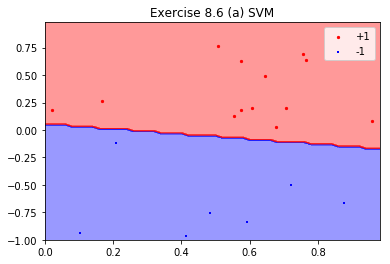

In [38]:
xsp1 = df.loc[df['y']==1]['x1'].values
ysp1 = df.loc[df['y']==1]['x2'].values
xsm1 = df.loc[df['y']==-1]['x1'].values
ysm1 = df.loc[df['y']==-1]['x2'].values

#plt.tight_layout()
X_train = df[['x1', 'x2']].values
y_train = df['y'].values
cls = my_svm
x1_min, x1_max = 0, 1
x2_min, x2_max = -1, 1
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Exercise 8.6 (a) SVM", yscale = None, ylb = -1, yub = 1,
               xlb = 0, xub = 1, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None, marker_sizes=[5, 5])

#### Exercise 8.6 (b)

Picked one positive point on the left and one negative on the right lower corner of the plot, so their perpendicular bisector separating plane is a bad separator. 

We need put them at the end of the points so the PLA algo will have no chance to adjust the separating line using other points. 

In this case, it took 16 iterations to make PLA converge.

In [53]:
df2 = pd.DataFrame({'x0':np.ones(N)})
df1 = df.copy()
df1.insert(0,'x0',df2['x0'])

indexes = np.arange(N)
indexes[18] = 0
indexes[0] = 18
indexes[19] = 17
indexes[17] = 19
df1 = df1.reindex(indexes)
#df1.values

Number of positive points:  13
Number of negatives points:  7
Final correctness:  20 . Total iteration:  16
Final w: [0.         1.50015002 3.00990099]
-- Out-of-Sample Error: 0.13


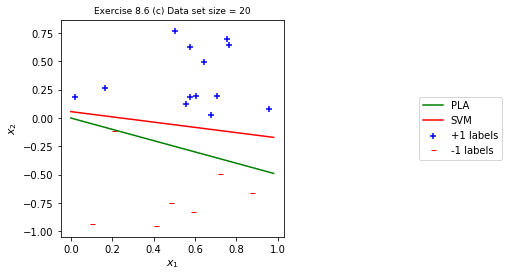

In [54]:
#### Exercise 8.6 (b)


eta = 1
use_adaline=False
maxit = 1000
dim = 2

positives = df1.loc[df1['y']==1]
negatives = df1.loc[df1['y']==-1]

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)

ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')
print('Number of positive points: ', len(positives))
print('Number of negatives points: ', len(negatives))

norm_g, num_its, _ = lm.perceptron(df1.values, dim, maxit, use_adaline, eta, 
                                   randomize=False, print_out = True)    


x1 = np.arange(0, 1, 0.02)
norm_g = norm_g/norm_g[-1]

c = np.ones((N_t, 1))
XX_t = np.hstack((c, X_t))        
print(f"-- Out-of-Sample Error: {lm.calc_error(norm_g, XX_t, y_t)}")

# ------- Ploting ------
hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'g', label='PLA')
svm = ax.plot(x1, -(my_svm.w[0]*x1+my_svm.b)/my_svm.w[1], c = 'r', label='SVM')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Exercise 8.6 (c) Data set size = %s'%N, fontsize=9)
ax.axis('tight')
legend_x = 2.0
legend_y = 0.5
ax.legend(['PLA', 'SVM',
           '+1 labels', '-1 labels', ], 
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
plt.show()


#### Exercise 8.6 (c)
It's clear that PLA can be greatly affected by the ordering of data points, while SVM is stable with respect to the point orders. 

The out-of-sample error is much larger from PLA.

#### Exercise 8.7

* (a) Assume we have $\rho_1 < \rho_2$, consider the corresponding hypothesis sets $\mathcal{H}_{\rho_1}$ and $\mathcal{H}_{\rho_2}$. For a given data set $(x_1,y_1),\dots, (x_N, y_N)$, for any given dichotomy on the data set, if the dichotomy can be implemented by a hypothesis $h_2 \in \mathcal{H}_{\rho_2}$, then there must be a hypothesis $h_1 \in \mathcal{H}_{\rho_1}$ that can implement the dichotomy as well. 

This is because we can choose the $(b_2,w_2)$ from $h_2$, since $\rho_2 = \frac{1}{|w_2|}$, if we set $(b_1, w_1) =  \frac{\rho_2}{\rho_1}(b_2, w_2)$ such that $|w_1| = \frac{1}{\rho_1}$, so $h_1 = (b_1, w_1)$ belongs to $\mathcal{H}_{\rho_1}$ and has a margin of $\rho_1$.

As the margin of $h_1$ is smaller than the margin of $h_2$ ($\rho_1 < \rho_2$), if $h_2$ can implement the dichotomy, $h_1$ certainly can do that too. The reverse is not necessarily true since if we add points (Assuming adding the proper signs on the two sides of $h_1$) that are in the margin of $h_2$ but outside the margin of $h_1$, $h_2$ won't be able to implement the new dichotomy while $h_1$ can still do. 

So we see that $d_{VC}(\rho)$ is non-increasing in $\rho$.

* (b) We first prove that for any 3 points in the unit disc, there must be two that are within distance $\sqrt{3}$ of each other. If this is not ture, then there exists 3 points in the unit disc, such that the distances between any two points are larger than $\sqrt{3}$. 

The center of the disc can't be one of such 3 points, because the distance from center to any point is less than or equal to 1. 
Now we draw lines from the center to 3 points and extend them to meet with the boundary of the disc. We check the lengths of the segments (formed by connecting the 3 points on the circle), they must be all larger than $\sqrt{3}$.

We can compute the angle that each segment corresponds to, e.g. $\cos(\theta) = \frac{a^2+b^2-c^2}{2ab}$, where $a=b=1$ and $c$ is the segment, $\theta$ is the corresponding angle. We have $\cos(\theta) = 1 - \frac{c^2}{2} < -0.5$, we conclude that $\theta > \frac{2\pi}{3}$. This is true for all three angles, so we have a total angle of larger than $3\times \frac{2\pi}{3} = 2\pi$, which contradicts. 

So for any 3 points in the unit disc, there must be two that are within distance of $\sqrt{3}$ of each other.

Suppose that when $\rho >\frac{\sqrt{3}}{2}$, $d_{VC}(\rho) \ge 3$, that is the $\mathcal{H}_{\rho}$ can shatter at least 3 points. 

Now consider any 3 points in the unit disc, from what we have proved, there must be two that are within distance of $\sqrt{3}$ of each other. Consider the dichotomy when the two points is one positive, one negative, any hypothesis hyperplane (a line) that can implement this dichotomy needs to cross with the line between the two points. We see that of the two distances from the two points to the hyperplane, there is at least one that is in the margin, i.e. less than $\rho$. The distances are equal when the line is passing through the middle and perpendicular to the line between the two points. And the distances there are both $\frac{\sqrt{3}}{2}$, which is smaller than $\rho$, meaning at least one point will always stay in the margin of any hyperplane that can implement the dichotomy. 

This contradicts with the assumption that the hypothesis set $\mathcal{H}_{\rho}$ can shatter any 3 points. Thus $d_{VC}(\rho) < 3$ when $\rho >\frac{\sqrt{3}}{2}$

#### Exercise 8.8

* (a) In Figure 8.5, there are total 23 points with 5 support vectors, so the bound is $E_{CV}(SVM) \le \frac{5}{23}$

* (b) If one of the four support vectors in a gray box are removed, it doesn't change the classifier. The classifier still has the maximum margin among all candidates.

* (c) The bound is now $\frac{4}{23}$

#### Exercise 8.9

* (a) Since $u_0$ is optimal for (8.10), so we have $c-a^Tu_0 \le 0$, the maximum value that can be achieved with $\alpha \ge 0$ is thus $\max_{\alpha \ge 0} \alpha (c-a^Tu_0) = 0$

* (b) We now prove that $u_1$ is feasible for (8.10). Assume the contrary that $c-a^Tu_1 > 0$, then $\max_{\alpha \ge 0} \alpha (c-a^Tu_0) = \infty$ and the objective in (8.11) goes to infinite. However, when $u=u_0$, we have a finite objective in (8.11) as $\max_{\alpha \ge 0} \alpha (c-a^Tu_0) = 0$. This contradicts the assumption that $u_1$ is optimal for (8.11). So we have $c-a^Tu_1 \le 0$ and $u_1$ is feasible for (8.10).

* (c) For the objective in (8.11), we know from problem (a),(b) that for both $u_0, u_1$, we have $c-a^Tu_0 \le 0$ and $c-a^Tu_1 \le 0$. Then we have $\max_{\alpha \ge 0} \alpha (c-a^Tu_1) = \max_{\alpha \ge 0} \alpha (c-a^Tu_1) = 0$. 

Thus we see that $u_1$ actually minimizes $\min_{u\in R^L}\frac{1}{2}u^TQu + p^Tu$, on the other hand, by definition, $u_0$ also minimize the objective in (8.10), which is the same objective here. So we must have $\frac{1}{2}u^T_0Qu_0 + p^Tu_0 = \frac{1}{2}u^T_1Qu_1 + p^Tu_1$

* (d) Let $u^*$ be any optimal solution for (8.11), then by problem (b) and (a), we have $\max_{\alpha \ge 0} \alpha (c-a^Tu^*) = 0$, if the maximum is attained at $\alpha^*$, then $\alpha^* (c-a^Tu^*) = 0$, so we either have $c-a^Tu^*= 0$ or $\alpha^* = 0$.

#### Exercise 8.10

\begin{align*}
\frac{\partial{\mathcal{L}}}{\partial{u}_1} &= 2u_1 - \alpha_1 -\alpha_2 = 0 \\
\frac{\partial{\mathcal{L}}}{\partial{u}_2} &= 2u_2 - 2\alpha_1 -\alpha_3 = 0 \\
\end{align*}

Let the derivatives equal to 0, we have $u_1 = \frac{\alpha_1 + \alpha_2}{2}, u_2 = \frac{2\alpha_1 + \alpha_3}{2}$.

\begin{align*}
\mathcal{L}(u,\alpha) &= u^2_1 + u^2_2 + \alpha_1(2-u_1-2u_2) -\alpha_2u_1 -\alpha_3u_2 \\
&=  \frac{(\alpha_1 + \alpha_2)^2}{4} + \frac{(2\alpha_1 + \alpha_3)^2}{4} + \alpha_1 ( 2- \frac{\alpha_1 + \alpha_2}{2} - (2\alpha_1 + \alpha_3)) - \alpha_2 \frac{\alpha_1 + \alpha_2}{2} - \alpha_3 \frac{2\alpha_1 + \alpha_3}{2} \\
&= \frac{1}{4}\alpha^2_1 + \frac{1}{2}\alpha_1\alpha_2 + \frac{1}{4}\alpha^2_2 + \alpha^2_1 + \alpha_1\alpha_3 +  \frac{1}{4}\alpha^2_3 + 2\alpha_1 -  \frac{1}{2}\alpha^2_1 -  \frac{1}{2}\alpha_1\alpha_2 - 2\alpha^2_1 - \alpha_1\alpha_3 -  \frac{1}{2}\alpha_1\alpha_2 -  \frac{1}{2}\alpha^2_2 - \alpha_1\alpha_3 - \frac{1}{2}\alpha^2_3\\
&= -\frac{5}{4}\alpha^2_1 - \frac{1}{4}\alpha^2_2 \frac{1}{4}\alpha^2_3 - \frac{1}{2}\alpha_1\alpha_2 - \alpha_1\alpha_3 + 2\alpha_1\\
\end{align*}


#### Exercise 8.11

Change $\sum^N_{n=1}y_n\alpha_n = 0$ into $\sum^N_{n=1}y_n\alpha_n \ge 0$ and $\sum^N_{n=1}y_n\alpha_n \le 0$, i.e. $-\sum^N_{n=1}y_n\alpha_n \ge 0$, combine these two conditions with $\alpha_n \ge 0$, we have

\begin{align*}
A_D &= \begin{bmatrix}y^T \\ -y^T \\ I_{N\times N}\end{bmatrix}\\
\end{align*}

We set $M=\begin{bmatrix}y_1x_1 & y_2x_2 & \dots & y_Nx_N\end{bmatrix}$, where $x_n, n=1,\dots, N$ are the column vectors with dimension $d\times 1$, so $M$ has a dimension of $d \times N$. 

We also have column vectors of $y=\begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_N\end{bmatrix}$ and $\alpha = \begin{bmatrix}\alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_N\end{bmatrix}$

Let $Q_D= M^TM = \begin{bmatrix}y_1y_1x^T_1x_1 & y_1y_2x^T_1x_2 & \dots & y_1y_Nx^T_1x_N\\ y_ny_1x^T_nx_1 & y_ny_2x^T_nx_2 & \dots & y_ny_Nx^T_nx_N\\ \dots & \dots & \dots & \dots\\ y_Ny_1x^T_Nx_1 & y_Ny_2x^T_Nx_2 & \dots & y_Ny_Nx^T_Nx_N\end{bmatrix}$. $M$ has a dimension of $N\times N$.



So we can write 

\begin{align*}
\frac{1}{2}\sum^N_{m=1}\sum^N_{n=1} y_ny_m\alpha_n \alpha_m x^T_nx_m &= \frac{1}{2}\sum^N_{m=1}y_m\alpha_m\sum^N_{n=1} y_n\alpha_n  x^T_nx_m\\
&= \frac{1}{2}\sum^N_{m=1}\alpha_m \sum^N_{n=1}\alpha_n y_nx^T_nx_my_m\\
&= \frac{1}{2}\sum^N_{m=1}\alpha_m \sum^N_{n=1}\alpha_n [Q_D]_{n,m}\\
&= \frac{1}{2}\alpha^T Q_D \alpha\\
\end{align*}

* (b) This part is proved in problem (a) when we construct matrix $Q_D$. So $X_s = M^T$, and $Q_D = X_sX^T_s$

For any vector $\alpha \ne 0$, we have 

\begin{align*}
\alpha^TQ_D \alpha & = \alpha^T X_sX^T_s \alpha \\
&= (\alpha^TX_s)(\alpha^TX_s)^T\\
&= |\alpha^TX_s|^2 \\
&\ge 0\\
\end{align*}

So $Q_D$ is positive semi-definite.

#### Exercise 8.12

If all the data is from one class, then $\alpha^*_n = 0$ for $n=1,\dots, N$.

* (a) $w^* = \sum^N_{n=1}y_n\alpha^*_n x_n = 0$

* (b) Since all $\alpha^*_n = 0$, we can apply KKT conditions here to obtain $b^*$. To satisfy the constraints on the primal optimization problem, we need to have $b \ge 1$ if all points are positive.

#### Exercise 8.13

Consider a data set with two positive examples at $x_1 = (0,0)$ and $x_2 = (1,0)$, and one negative example at $x_3 = (0,1)$. We look for hyperplane (line) that separate the negative example with the positive examples. As there's only 1 negative example, it has to be the support vector, either one of the two positive examples or both of them can be the support vectors. It's not hard by trial and error to find out that the optimal fat-hyperplane is $-2[x]_2+1 = 0$, i.e. with $(b,w) = (1, [0, -2])$

The optimal solution $\alpha^*$ has to satisfy $w^* = \sum^N_{n=1}y_n\alpha^*_nx_n$,

\begin{align*}
w^* &= \sum^N_{n=1}y_n\alpha^*_nx_n \\
&= y_1\alpha_1x_1 + y_2\alpha_2x_2 + y_3\alpha_3x_3 \\
&= \alpha_1\begin{bmatrix}0 \\ 0\end{bmatrix} + \alpha_2\begin{bmatrix}1 \\ 0\end{bmatrix} - \alpha_3\begin{bmatrix}0 \\ 1\end{bmatrix} \\
&= \begin{bmatrix}\alpha_1 \\ -\alpha_3\end{bmatrix}
\end{align*}

since $w^* = \begin{bmatrix}0 \\ -2\end{bmatrix}$, we have $\alpha_1 = 0$.

On the other hand, for this hyperplane, all three points are support vectors. 
It's easy to check that for $n=1,2,3$, we have $y_n(w^*Tx_n + b^*) = 1$. 

So if a point $(x_n, y_n)$ is on the boundary satisfying $y_n((w^*)^Tx_n + b^*)=1$, it's possible that $\alpha^*_n= 0$ as the $\alpha^*_1 = 0$ here.

#### Exercise 8.14

If we remove a data point $(x_n, y_n)$ with $\alpha^*_n = 0$, suppose the previous optimal solution is $\mathbf{\alpha}^*$.

* (a) Since $\mathbf{\alpha}^*$ is the optimal solution for the previous dual problem, It satisfies the constraints in (8.21). i.e. $\alpha_i \ge 0$ for $i=1,\dots, N$. And

$\sum^N_{i=1} y_i\alpha_i = \sum^N_{i\ne n} y_i\alpha_i = 0$ since $\alpha^*_n = 0$. The second part is exactly the new constraint for the problem with $(x_n, y_n)$ removed.

So the solution $\mathbf{\alpha}^*$ (after removing $\alpha^*_n$) is feasible for the new dual problem.

* (b) If there's another feasible solution ($\alpha'$) for the new dual and it has a lower objective value than $\mathbf{\alpha}^*$. We construct a new solution for previous dual problem by adding $\alpha^*_n = 0$ into $\alpha'$, i.e. $\alpha^c$. It's clear that $\alpha^c$ is a feasible solution for the previous dual problem.

From (8.21), the objective value of $\alpha^c$ for previous dual problem is thus:

\begin{align*}
V(\alpha^c) &= \frac{1}{2}\sum^N_{i=1}\sum^N_{j=1}y_iy_j\alpha^c_i\alpha^c_j x^T_ix_j - \sum^N_{i=1}\alpha^c_i \\
&= \frac{1}{2}\sum^N_{i\ne n}\sum^N_{j\ne n}y_iy_j\alpha^c_i\alpha^c_j x^T_ix_j - \sum^N_{i\ne n}\alpha^c_i\\
&< \frac{1}{2}\sum^N_{i\ne n}\sum^N_{j\ne n}y_iy_j\alpha^*_i\alpha^*_j x^T_ix_j - \sum^N_{i\ne n}\alpha^*_i\\
&= V(\alpha^*) \\
\end{align*}

This contradicts the fact that $\alpha^*$ is the optimal solution for the previous problem. So we conclude there's no other feasible solution for the new dual problem that has a lower objective value than $\mathbf{\alpha}^*$.

* (c) Hence we showed that $\mathbf{\alpha}^*$ (minus $\alpha^*_n$) is optimal for the new dual problem.

* (d) Since $w^* = \sum^N_{i=1}y_i\alpha^*_ix_i = \sum^N_{i\ne n}y_i\alpha^*_ix_i$. $w^*$ is the same as previous problem. 
Also $b^*$ is computed using a point where $\alpha^*_s > 0$, it's not affected by $\alpha^*_n$ as well. So we conclude that the optimal hyperplane doesn't change. 

* (e) As the final hypothesis is not changed when we throw out any data point with $\alpha^*_n=0$, after we throw out all such points, we are left with data points that have $\alpha^*_n > 0$, thus we shows that $E_{CV} = \frac{1}{N}\sum^N_{n=1}e_n \le \frac{\text{number of }\alpha^*_n > 0}{N}$

#### Exercise 8.15

* (a) 

\begin{align*}
\Phi^T(x)\Phi(x) &= \begin{bmatrix}\Phi^T_1 & \Phi^T_2\end{bmatrix}\begin{bmatrix}\Phi_1 \\ \Phi_2\end{bmatrix}\\
&= \Phi^T_1 \Phi_1 + \Phi^T_2\Phi_2 \\
&= K_1 + K_2 \\
\end{align*}

* (b) Let $\Phi_1 = \begin{bmatrix} a_1 \\ \dots \\ a_N\end{bmatrix}$, and $\Phi_2 = \begin{bmatrix} b_1 \\ \dots \\ b_M\end{bmatrix}$, so we have $K_1 = \Phi_1^T \Phi_1 = \sum a^2_i $ and $K_2 = \Phi_2^T \Phi_2 = \sum b^2_i $

$\Phi = \Phi_1 \Phi_2^T = \begin{bmatrix}v_1 \\ \dots \\ v_N\end{bmatrix}$ where $v_n = \begin{bmatrix}a_nb_1 \\ \dots \\ a_nb_M\end{bmatrix}$

So we have 

$K=\Phi^T\Phi = \sum v_i^Tv_i = \sum_{n=1} \sum_{m=1} a_n^2b_m^2 = \sum_{n=1}a^2_n \sum_{m=1}b^2_m = K_1K_2$
* (c) It shows that $K_1$ and $K_2$ are kernels, then so are $K_1 + K_2$ and $K_1K_2$. 

#### Exercise 8.16

* (a) (8.30) minimizes w.r.t. $w, b, \xi$, so the optimization variable is $u = \begin{bmatrix} b \\ w \\ \xi \end{bmatrix}$

* (b) There are $N$ constraints for $y_n(w^Tx_n +b) \ge 1 - \xi_n$, and $N$ constraints for $\xi \ge 0$. It's easy to see that RHS has $c=\begin{bmatrix}1_N \\ 0_N \end{bmatrix}$. 

On the LHS, $A=\begin{bmatrix}YX & I_N \\ 0_{N\times (d+1)} & I_N \end{bmatrix}$ where $YX = \begin{bmatrix}y_1 & y_1x^T_1 \\ \dots & \dots \\ y_n & y_nx^T_n \\ \dots & \dots \\ y_N & y_Nx^T_N \end{bmatrix}$ as in exercise 8.4

The $p^Tu$ term is $C\sum\xi_n$, so we have $p = \begin{bmatrix}0_{(d+1)\times 1} \\ C_{N\times 1}\end{bmatrix}$

And finally the $Q = \begin{bmatrix}0 & 0^T_d & 0^T_N \\ 0_d & I_d & 0_{d\times N} \\ 0_N & 0_{N\times d} & 0_{N\times N}\end{bmatrix}$ with some work. 

* (c) Once we have $u^*$, then $b^* = u^*_0$, $w^* = u^*_{1:d+1}$, $\xi^* = u^*_{d+2:d+1+N}$

* (d) Any point with $\xi_n > 0$ violates the margin. The points with $y_n(w^Tx_n +b) = 1$ are on the margin, and the points with $y_n(w^Tx_n +b) > 1$ are correctly separated and outside the margin.

#### Exercise 8.17

With classification 0/1 error, $E_{in} = \frac{1}{N}\sum^N_{n=1}[sign(w^Tx_n+b)\ne y_n]$ and $E_{SVM}(b,w) = \frac{1}{N}\sum^N_{n=1} max(1-y_n(w^Tx_n+b), 0)$.

For any $n$, 
* If the point is correctly classified with no violation, then $y_n(w^Tx_n+b) \ge 1$ and $max(1-y_n(w^Tx_n+b), 0) = 0$, so $e_{in} = e_{SVM}$
* If the point is correctly classified with violation, then $ 1 > y_n(w^Tx_n+b) \ge 0$, so $max(1-y_n(w^Tx_n+b), 0) = 1-y_n(w^Tx_n+b)$, so we have $0 = e_{in} < e_{SVM}$ 
* If the point is wrongly classified, then we have $y_n(w^Tx_n+b) < 0$ and $max(1-y_n(w^Tx_n+b), 0) = 1 - y_n(w^Tx_n+b) > 1$, so we have $1 = e_{in} < e_{SVM}$ 

We conclude that $E_{in} \le E_{SVM}$

#### Problem 8.1

let the two points be $(x_{+},y_{+})$ and $(x_{-}, y_{-})$, and $y_{+} = 1, y_{-} = -1$. From (8.4), we have to minimize

$E = \frac{1}{2}w^Tw $ with two constraints: $y_{+}(w^Tx_{+} + b) \ge 1$ and $y_{-}(w^Tx_{-} + b) \ge 1$. That is

\begin{align*}
w^Tx_{+} + b &\ge 1 \\
w^Tx_{-} + b &\le -1 \\
\end{align*}

Subtract the two inequations, we have $w^T(x_{+} - x_{-}) \ge 2$, so we have $|w^T||x_{+} - x_{-}| \ge |w^T(x_{+} - x_{-})| \ge 2$, then $|w| \ge \frac{2}{|x_{+} - x_{-}|}$. The minimal objective value is thus 

$E=\frac{1}{2} \frac{4}{|x_{+} - x_{-}|^2} = \frac{2}{|x_{+} - x_{-}|^2}$

The optimal hyperplane then have $w^* = \frac{2}{x_{+} - x_{-}}$ and $b^* = 1 - (w^*)^Tx_{+} = \frac{x_{+}+x_{-}}{x_{-} - x_{+}}$. 

The margin is thus $\frac{1}{|w^*|} = \frac{|x_{+} - x_{-}|}{2}$

This agrees with the results from exercise 8.1

#### Problem 8.2

For this data, we let $w=\begin{bmatrix}w_1 \\ w_2 \end{bmatrix}$, we have the objective value

\begin{align*}
E &= \frac{1}{2}w^Tw \\
&= \frac{1}{2}(w^2_1 + w^2_2) \\
\end{align*}

The constraints are 

\begin{align*}
y_1(w_1x_{11} + w_2x_{12} + b) &= -b \ge 1 \\
y_2(w_1x_{21} + w_2x_{22} + b) &= w_2 - b \ge 1 \\
y_3(w_1x_{31} + w_2x_{32} + b) &= -2w_1 + b \ge 1 \\
\end{align*}

Combine the first and third inequalities, we have $w_1 \le -1$. Combine the first and the second, we have $w_2 \ge 0$. 
So the objective achieves minimal at $w_1 = -1, w_2 = 0$, where $E=\frac{1}{2}$.

The optimal $b= -1$.

The margin is thus $\frac{1}{|w|} = \frac{1}{\sqrt{w^2_1+w^2_2}} = 1$


#### Problem 8.3

* (a) 
Let $\alpha = \begin{bmatrix}\alpha_1 \\ \alpha_2 \\\alpha_3 \\\alpha_4 \end{bmatrix}$. 

With $Q_D=\begin{bmatrix}0 & 0 & 0 & 0 \\ 0 & 8 & -4 & -6 \\ 0 & -4 & 4 & 6 \\ 0 & -6 & 6 & 9\end{bmatrix}$, and $A_D = \begin{bmatrix}-1 & -1 & 1 & 1 \\ 1 & 1 & -1 & -1 \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix}$,  we have

\begin{align*}
\mathcal{L}(\alpha) &=\frac{1}{2}\alpha^TQ_D\alpha - 1^T_N\alpha \\
&=\frac{1}{2}( 8\alpha^2_2 -4\alpha_2\alpha_3 -6\alpha_2\alpha_4 -4\alpha_2\alpha_3 + 4\alpha^2_3 + 6\alpha_3\alpha_4 -6\alpha_2\alpha_4 + 6\alpha_3\alpha_4+9\alpha^2_4) - (\alpha_1+\alpha_2+\alpha_3+\alpha_4)\\
&= 4\alpha^2_2+ 2\alpha^2_3+\frac{9}{2}\alpha^2_4 -4\alpha_2\alpha_3 -6\alpha_2\alpha_4  + 6\alpha_3\alpha_4 - \alpha_1-\alpha_2-\alpha_3-\alpha_4\\
\end{align*}

The constraints are: $A_D\alpha \ge 0$, i.e.

\begin{align*}
-\alpha_1-\alpha_2 + \alpha_3 + \alpha_4 &\ge 0 \\
\alpha_1+\alpha_2 - \alpha_3 - \alpha_4 &\ge 0 \\
\alpha_1 &\ge 0 \\
\alpha_2 &\ge 0 \\
\alpha_3 &\ge 0 \\
\alpha_4 &\ge 0 \\
\end{align*}

The first two inequalities combine into $\alpha_1+\alpha_2 = \alpha_3 + \alpha_4$

* (b) 

From the equality constraint, we have $\alpha_1 = \alpha_3+\alpha_4 - \alpha_2$, replace $\alpha_1$ in the $\mathcal{L}(\alpha)$, we have 

\begin{align*}
\mathcal{L}(\alpha) &= 4\alpha^2_2+ 2\alpha^2_3+\frac{9}{2}\alpha^2_4 -4\alpha_2\alpha_3 -6\alpha_2\alpha_4  + 6\alpha_3\alpha_4 - (\alpha_3+\alpha_4 - \alpha_2)-\alpha_2-\alpha_3-\alpha_4\\
&= 4\alpha^2_2+ 2\alpha^2_3+\frac{9}{2}\alpha^2_4 -4\alpha_2\alpha_3 -6\alpha_2\alpha_4  + 6\alpha_3\alpha_4 -2\alpha_3-2\alpha_4\\
\end{align*}

* (c) Fix $\alpha_3, \alpha_4 \ge 0$, take derivative of $\mathcal{L}(\alpha)$ w.r.t. $\alpha_2$ and set it to zero, we have

\begin{align*}
\frac{\partial{\mathcal{L}(\alpha)}}{\partial{\alpha_2}} &= 8\alpha_2 - 4\alpha_3 - 6\alpha_4 \\
\alpha_2 &= \frac{1}{2}\alpha_3 + \frac{3}{4}\alpha_4\\
\end{align*}

So $\alpha_1 = \alpha_3 + \alpha_4 - \alpha_2 = \frac{1}{2}\alpha_3 + \frac{1}{4}\alpha_4$

Note that both $\alpha_1 \ge 0$ and $\alpha_3 \ge 0$ if $\alpha_3,\alpha_4\ge0$.

* (d) Now we compute $\mathcal{L}(\alpha)$

\begin{align*}
\mathcal{L}(\alpha) &= 4\alpha^2_2+ 2\alpha^2_3+\frac{9}{2}\alpha^2_4 -4\alpha_2\alpha_3 -6\alpha_2\alpha_4  + 6\alpha_3\alpha_4 -2\alpha_3-2\alpha_4\\
&= 4(\frac{1}{2}\alpha_3 + \frac{3}{4}\alpha_4)^2 + 2\alpha^2_3+\frac{9}{2}\alpha^2_4 -4(\frac{1}{2}\alpha_3 + \frac{3}{4}\alpha_4)\alpha_3-6(\frac{1}{2}\alpha_3 + \frac{3}{4}\alpha_4)\alpha_4 +6\alpha_3\alpha_4-2\alpha_3  -2\alpha_4\\
&=\alpha^2_3 + 3\alpha_3\alpha_4 + \frac{9}{4}\alpha^2_4 + 2\alpha^2_3 + \frac{9}{2}\alpha^2_4 - 2\alpha_3^2 - 3\alpha_3\alpha_4 - 3\alpha_3\alpha_4 - \frac{9}{2}\alpha_4^2 + 6\alpha_3\alpha_4 -2\alpha_3-2\alpha_4\\
&= \alpha_3^2 + \frac{9}{4}\alpha^2_4 + 3\alpha_3\alpha_4 -2\alpha_3 - 2\alpha_4\\
&= \left(\alpha_3 + \frac{3\alpha_4 -2}{2}\right)^2 + \alpha_4 -1 \\
\end{align*}

It's clear that $\mathcal{L}(\alpha)$ achieves minimal value of $-1$, when $\alpha_4 = 0$ and $\alpha_3 = 1$

Then we have $\alpha_2 = \frac{1}{2}\alpha_3 + \frac{3}{4}\alpha_4 = \frac{1}{2}$ and $\alpha_1 = \alpha_3+\alpha_4 - \alpha_2 = \frac{1}{2}$

#### Problem 8.4

Using data from exercise 8.2, we have $N=3$, let $\alpha = \begin{bmatrix}\alpha_1 \\ \alpha_2 \\ \alpha_3 \end{bmatrix}$, then we have constraints:

$\alpha_1 \ge 0, \alpha_2 \ge 0, \alpha_3 \ge 0$ and $\sum^N y_n\alpha_n = -\alpha_1 - \alpha_2 + \alpha_3 = 0$

Let $X=\begin{bmatrix}0 & 0 \\ 2 & 2 \\ 2 & 0 \end{bmatrix} = \begin{bmatrix}x^T_1 \\ x^T_2 \\ x^T_3 \end{bmatrix}$, then we have 

$M = XX^T = \begin{bmatrix}0 & 0 & 0 \\ 0 & 8 & 4 \\ 0 & 4 & 4\end{bmatrix}$, which has $M_{ij} = x^T_ix_j$

The objective value is 

\begin{align*}
\mathcal{L}(\alpha) &= \frac{1}{2} \sum^N_{m=1}\sum^N_{n=1} y_ny_m\alpha_n\alpha_m x^T_nx_m - \sum^N \alpha_n \\
&= \frac{1}{2} \sum^N_{m=1}y_m\alpha_m\sum^N_{n=1} y_n\alpha_n x^T_nx_m - (\alpha_1+\alpha_2+\alpha_3) \\
&= \frac{1}{2} \sum^N_{m=2}y_m\alpha_m\sum^N_{n=2} y_n\alpha_n x^T_nx_m - (\alpha_1+\alpha_2+\alpha_3) \\
&= \frac{1}{2} (-\alpha_2(-8\alpha_2 + 4\alpha_3) + \alpha_3(-4\alpha_2 + 4\alpha_3)) - (\alpha_1+\alpha_2+\alpha_3) \\
&= 4\alpha_2^2 - 2\alpha_2\alpha_3 -2\alpha_2\alpha_3 + 2\alpha_3^2 - \alpha_1 - \alpha_2 - \alpha_3\\
&= 4\alpha_2^2 - 4\alpha_2\alpha_3 + 2\alpha_3^2 - \alpha_1 - \alpha_2 - \alpha_3\\
\end{align*}

Take $\alpha_1 = \alpha_3 - \alpha_2$ into the formula, we have

$\mathcal{L}(\alpha) = 4\alpha_2^2 - 4\alpha_2\alpha_3 + 2\alpha_3^2 - 2\alpha_3 = (2\alpha_2 - \alpha_3)^2 + (\alpha_3 -1)^2 -1$

It's clear that at the minimal, $\alpha_3 = 1, \alpha_2 = \frac{1}{2}$ so $\alpha_1 = \frac{1}{2}$.

We compute the optimal weights $w^* = \sum^N y_n\alpha_nx_n = \begin{bmatrix}1 \\ -1 \end{bmatrix}$, since all $\alpha > 0$, pick one, e.g. $\alpha_1 = \frac{1}{2}$, we should have $y_1(w^Tx_1 + b) = 1$, i.e. $-b= 1$, so $b=-1$.

This is consistent with the results from example 8.2

#### Problem 8.5

In [120]:
def get_random_separator_85(lb=-1, ub=1):
    dim = 1
    max_v = 10000
    N = 1
    a = data.generate_random_numbers(N, dim, max_v, lb, ub)
    return a.flatten()[0]

def get_max_margin_separator_85(df):
    min_pos_x2 = np.min(df.loc[df['y']==1]['x2'])
    max_neg_x2 = np.max(df.loc[df['y']==-1]['x2'])
    margin = (min_pos_x2 - max_neg_x2)/2
    sep = min_pos_x2 - margin
    return sep, margin

def gen_data_85(N):
    dfp = generate_data_84(int(N/2), x1_lb = -1, x1_ub=1, x2_lb = 0, x2_ub = 1)
    dfn = generate_data_84(int(N/2), x1_lb = -1, x1_ub=1, x2_lb = -1, x2_ub = 0)
    df = pd.concat([dfp, dfn])
    return df

def run_one_experiment_85(N, do_print = False):
    df = gen_data_85(N)
    if do_print:
        print(f"-- Number of positive points: {df.loc[df['y']>0]['y'].count()}")

    rand_sep = get_random_separator_85()    
    svm_sep, svm_margin = get_max_margin_separator_85(df)
    if do_print:
        print(f"-- The separator selected randomly: x_2 = {rand_sep}")  
        print(f"-- The separator selected by SVM: x_2 = {svm_sep}")       
    return df, rand_sep, svm_sep

#### Problem 8.5 (a)-(b)

In [122]:
N=6
df, rand_sep, svm_sep = run_one_experiment_85(N, do_print = True)   

-- Number of positive points: 3
-- The separator selected randomly: x_2 = -0.8821882188218821
-- The separator selected by SVM: x_2 = -0.029652965296529655


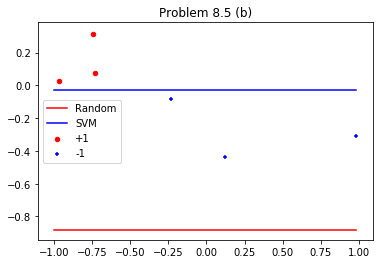

In [123]:
xsp1 = df.loc[df['y']==1]['x1'].values
ysp1 = df.loc[df['y']==1]['x2'].values
xsm1 = df.loc[df['y']==-1]['x1'].values
ysm1 = df.loc[df['y']==-1]['x2'].values

x1_min, x1_max = 0, 1
x2_min, x2_max = -1, 1
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)


x1 = np.arange(-1, 1, 0.02)
rand_y = rand_sep * np.ones(x1.shape)
svm_y = svm_sep * np.ones(x1.shape)

myplot.plt_plot([x1, x1], [rand_y, svm_y], 'plot', 
               colors = ['r', 'b', 'g'], markers = [None, None], labels = ['Random', 'SVM'], 
               title = "Problem 8.5 (b)", yscale = None, ylb = -1, yub = 1,
               xlb = -1, xub = 1, xlabel = None, ylabel = None,
               legends = ['Random', 'SVM'], legendx = None, legendy = None, marker_sizes=[5, 5])

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 8.5 (b)", yscale = None, ylb = -1, yub = 1,
               xlb = -1, xub = 1, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None, marker_sizes=[20, 20])

#### Problem 8.5 (c)-(e)

In [130]:
def calc_average_hypothesis(seps):
    return np.mean(seps)

def calc_bias(seps, target_sep):
    avg_sep = calc_average_hypothesis(seps)
    return (avg_sep - target_sep)**2

def calc_variance(seps):
    return np.var(seps)

tot_exps = 1000000
N = 6
target_sep = 0 # target function is x_2 = 0

rand_seps = []
svm_seps = []
for t in np.arange(tot_exps):
    df, rand_sep, svm_sep = run_one_experiment_85(N, do_print = False)
    rand_seps.append(rand_sep)
    svm_seps.append(svm_sep)
    
rand_bias = calc_bias(rand_seps, target_sep)
svm_bias = calc_bias(svm_seps, target_sep)

rand_var = calc_variance(rand_seps)
svm_var = calc_variance(svm_seps)
print(f"Random algo: bias = {rand_bias}, variance = {rand_var}")
print(f"SVM algo: bias = {svm_bias}, variance = {svm_var}")

Random algo: bias = 6.003535985229288e-07, variance = 0.33376439549984216
SVM algo: bias = 1.1452071413084401e-08, variance = 0.018813320545832343


(array([49649., 50531., 50066., 49792., 49963., 49749., 49870., 49811.,
        50261., 49820., 49760., 49696., 50161., 50296., 49946., 50323.,
        49789., 49926., 50441., 50150.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

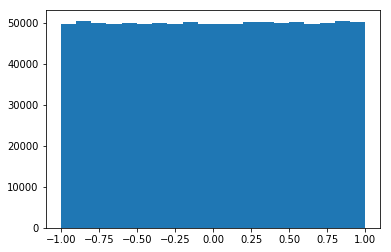

In [133]:
plt.hist(rand_seps, bins = 20)

(array([   254.,   1827.,   5708.,  13042.,  24334.,  40422.,  61350.,
         87105., 118854., 155067., 152396., 115131.,  84326.,  59266.,
         38915.,  22977.,  12077.,   5187.,   1562.,    200.]),
 array([-0.48054805, -0.43224822, -0.38394839, -0.33564856, -0.28734873,
        -0.2390489 , -0.19074907, -0.14244924, -0.09414941, -0.04584958,
         0.00245025,  0.05075008,  0.0990499 ,  0.14734973,  0.19564956,
         0.24394939,  0.29224922,  0.34054905,  0.38884888,  0.43714871,
         0.48544854]),
 <a list of 20 Patch objects>)

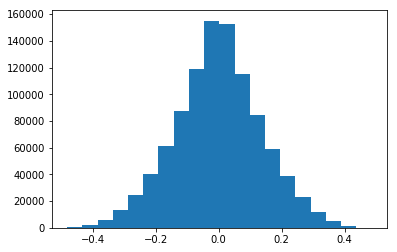

In [134]:
plt.hist(svm_seps, bins = 20)

#### Problem 8.5 (d)

* The histogram of the random separators is really flat. That's because they are chosen uniformly between $[-1, 1]$

* The histogram of the SVM separators concentrates around 0, which is the target function. That's because we pick the maximum margin between the positive and negative points. 

#### Problem 8.5 (e)

* The bias of random and SVM separators are close to each other. On average, their separators are close to the target separator. 
* However the variance of the SVM separator is much smaller than the ones from random separator. It indicates that the SVM is much better at generalization 

#### Problem 8.6

\begin{align*}
L &= \sum^N_{n=1}|x_n-\mu|^2 \\
&= \sum^N_{n=1}(x_n-\mu)^T(x_n-\mu) \\
&= \sum^N_{n=1}x_n^Tx_n-x_n^T\mu + \mu^Tx_n+\mu^T\mu \\
\end{align*}

Take derivative w.r.t. $\mu$ and let it equal to 0, we have

\begin{align*}
\frac{\partial{L}}{\partial{\mu}} &= \sum^N_{n=1} 2x_n - 2\mu \\
&= 2 \sum^N_{n=1} x_n - 2N \\
&= 0 \\
\end{align*}

So we have $\mu =  \frac{1}{N}\sum^N_{n=1} x_n $

#### Problem 8.7

Let $X=\begin{bmatrix}x_1 & \dots & x_N \end{bmatrix}$, where $x_i$, $i=1,\dots, N$ are the column vectors. Let $y=\begin{bmatrix}y_1 \\ \dots \\ y_N\end{bmatrix}$.

* (a) 

\begin{align*}
|\sum^N_{n=1}y_nx_n|^2 &= |Xy|^2 \\
&= (Xy)^T(Xy) \\
&= y^TX^TXy \\
&= y^TMy \\
&= y^T\begin{bmatrix}\sum^N_{m=1}M_{1m}y_m \\ \dots \\ \sum^N_{m=1}M_{Nm}y_m\end{bmatrix} \\
&= \sum^N_{n=1} y_n\sum^N_{m=1}M_{nm}y_m \\
&= \sum^N_{n=1} \sum^N_{m=1}y_ny_mM_{nm} \\
&= \sum^N_{n=1} \sum^N_{m=1}y_ny_mx^T_nx_m \\
\end{align*}

Where $M=X^TX$ and $M_{nm} = x^T_nx_m$.

* (b) When $n=m$, we have $y_ny_m = y_n^2 = 1$.
When $n\ne m$, we have $P(y_n=1) = \frac{1}{2}$ because there are $\frac{N}{2}$ positive points and $\frac{N}{2}$ negative points. We also have $P(y_n = 1|y_m=1) = \frac{\frac{N}{2}-1}{N-1}$ because if we have $y_m=1$, then we need choose another positive point (there are $\frac{N}{2}-1$ of them) from the remaining $N-1$ points.

\begin{align*}
P(y_ny_m = 1) &= P(y_ny_m = 1|y_m=1)P(y_m=1) + P(y_ny_m = 1|y_m=-1)P(y_m=-1)\\
&= P(y_n = 1|y_m=1)P(y_m=1) + P(y_n = -1|y_m=-1)P(y_m=-1)\\
&= P(y_n = 1|y_m=1)\frac{1}{2} + P(y_n = -1|y_m=-1)\frac{1}{2}\\
&= \frac{\frac{N}{2}-1}{N-1}\frac{1}{2} + \frac{\frac{N}{2}-1}{N-1}\frac{1}{2}\\
&= \frac{\frac{N}{2}-1}{N-1}\\
\end{align*}

We thus have $E[y_ny_m] = 1$ when $m=n$ because the when $n=m$, the probability of $P[y_ny_m=1] = 1$. 

When $n\ne m$, 

\begin{align*}
E[y_ny_m] &= 1P(y_ny_m =1 \cap n\ne m) - 1P(y_ny_m =-1 \cap n\ne m)\\
&= \frac{\frac{N}{2}-1}{N-1} - \frac{\frac{N}{2}}{N-1}\\
&= -\frac{1}{N-1}\\
\end{align*}

* (c) 

\begin{align*}
E\left[\|\sum^N_{n=1}y_nx_n\|^2\right] &= E\left[\sum^N_{n=1} \sum^N_{m=1}y_ny_mx^T_nx_m\right]\\
&= \sum^N_{n=1} \sum^N_{m=1}E[y_ny_m]x^T_nx_m\\
&= \sum^N_{n=1}\left[ \sum^N_{m\ne n}E[y_ny_m]x^T_nx_m + E[y_ny_n]x^T_nx_n\right]\\
&= \sum^N_{n=1}\left[x^T_nx_n - \sum^N_{m\ne n}\frac{1}{N-1}x^T_nx_m\right]\\
&= \sum^N_{n=1}\left[x^T_nx_n -\frac{1}{N-1} \sum^N_{m\ne n}x^T_nx_m\right]\\
&= \frac{N}{N-1}\sum^N_{n=1}\left[\frac{N-1}{N}x^T_nx_n - \frac{1}{N}\sum^N_{m\ne n}x^T_nx_m\right]\\
&= \frac{N}{N-1}\sum^N_{n=1}\left[x^T_nx_n - \frac{1}{N}\sum^N_{m=1}x^T_nx_m\right]\\
&= \frac{N}{N-1}\sum^N_{n=1}\left[x^T_nx_n - x^T_n\frac{1}{N}\sum^N_{m=1}x_m\right]\\
&= \frac{N}{N-1}\sum^N_{n=1}\left[x^T_nx_n - x^T_n\bar{x}\right]\\
&= \frac{N}{N-1}\sum^N_{n=1}\left[x^T_nx_n - x^T_n\bar{x}-(\bar{x}^Tx_n - \bar{x}^T\bar{x})\right]\\
&= \frac{N}{N-1}\sum^N_{n=1}(x_n - \bar{x})^T(x_n - \bar{x})\\
&= \frac{N}{N-1}\sum^N_{n=1}\|x_n - \bar{x}\|^2\\
\end{align*}

Where in the third to the last equation we  have used the fact that $\sum^N_{n=1}\bar{x}^Tx_n = \sum^N_{n=1}\bar{x}^T\bar{x}$

* (d) From problem 8.6, we see that $\sum^N_{n=1}\|x_n - \mu\|^2 $ achieves minimal value when $\mu = \frac{1}{N}\sum^N_{n=1}x_n$, since $\bar{x}=\frac{1}{N}\sum^N_{n=1}x_n$, let $\mu=0$, we have 

$\sum^N_{n=1}\|x_n - \bar{x}\|^2 \le \sum^N_{n=1}\|x_n\|^2 \le NR^2$ by the assumption.

* (e) Take the result of problem (d) into the equation of (c), we have

\begin{align*}
E\left[\|\sum^N_{n=1}y_nx_n\|^2\right] &\le \frac{N}{N-1}\sum^N_{n=1} \|x_n\|^2 \\
&\le \frac{N}{N-1}NR^2 \\ 
&= \frac{N^2R^2}{N-1}\\ 
\end{align*}

Let $Z=\|\sum^N_{n=1}y_nx_n\|^2$, and $t=\frac{N^2R^2}{N-1}$, we claim that $P[\sqrt{Z} \le \sqrt{t}]  = P[\|\sum^N_{n=1}y_nx_n\| \le \frac{N^2R^2}{\sqrt{N-1}}] > 0$, otherwise, if $P[\sqrt{Z} \le \sqrt{t}]  = 0$, then   $P[\sqrt{Z} > \sqrt{t}]  = 1$, we have (since $Z\le 0$, and $t>0$)

\begin{align*}
E[Z] &= \int_0^{\infty}ZP(dZ)\\
&= \int_t^{\infty}ZP(dZ)\\
&> t\int_t^{\infty}P(dZ)\\
&= t\\
\end{align*}

This contradicts with our conclusion that $E[Z] \le t$

So $P[\|\sum^N_{n=1}y_nx_n\| \le \frac{NR}{\sqrt{N-1}}] > 0$

#### Problem 8.8

* (a) Summing (8.31) on the $k$ positive and $k+1$ negative points respectively, we have

\begin{align*}
k\rho|w| &\le \sum_{y_n=1} y_n(w^Tx_n+b) \\
\rho|w| &\le \sum_{y_n=1} l_ny_n(w^Tx_n+b) \\
\end{align*}

where $l_n = \frac{1}{k}$ when $y_n = 1$
and

\begin{align*}
(k+1)\rho|w| &\le \sum_{y_n=-1} y_n(w^Tx_n+b) \\
\rho|w| &\le \sum_{y_n=-1} l_ny_n(w^Tx_n+b) \\
\end{align*}

where $l_n = \frac{1}{k+1}$ when $y_n = -1$. Note, there are $k$ of $l_n=\frac{1}{k}$ and $k+1$ of $l_n=\frac{1}{k+1}$.

Add the two inequalities, we have

\begin{align*}
2\rho|w| &\le \sum^N_{n=1}l_ny_n(w^Tx_n+b)\\
&= \sum^N_{n=1}l_ny_nw^Tx_n+b\sum^N_{n=1}l_ny_n\\
&= w^T\sum^N_{n=1}l_ny_nx_n+b(\sum_{y_n=1}\frac{1}{k}-\sum_{y_n=-1}\frac{1}{k+1})\\
&= w^T\sum^N_{n=1}l_ny_nx_n\\
&\le |w||\sum^N_{n=1}l_ny_nx_n| \\
\end{align*}

So we obtain $2\rho \le |\sum^N_{n=1}l_ny_nx_n|$

* (b) 
  * (i) This is similar to problem 8.7 (a), just replace the $y_n$ with $l_ny_n$.
  * (ii) For $m=n$, we have $y_ny_m = 1$, $E[l_nl_my_ny_m] = E[l_nl_m] = \frac{1}{k(k+1)}$
  * (iii) For $m\ne n$, we have 
  
  $P[l_nl_my_ny_m = \frac{1}{k^2}] =P[l_nl_my_ny_m = \frac{1}{k^2}|y_n=1]P(y_n=1) + P[l_nl_my_ny_m = \frac{1}{k^2}|y_n=-1]P(y_n=-1) = \frac{k-1}{N-1}\frac{k}{N} + 0 = \frac{k(k-1)}{N(N-1)}$
  
  $P[l_nl_my_ny_m = \frac{1}{(k+1)^2}] =P[l_nl_my_ny_m = \frac{1}{(k+1)^2}|y_n=1]P(y_n=1) + P[l_nl_my_ny_m = \frac{1}{(k+1)^2}|y_n=-1]P(y_n=-1) = 0 + \frac{k}{N-1}\frac{k+1}{N} = \frac{k(k+1)}{N(N-1)}$
  
  $P[l_nl_my_ny_m = -\frac{1}{k(k+1)}] =P[l_nl_my_ny_m = -\frac{1}{k(k+1)}|y_n=1]P(y_n=1) + P[l_nl_my_ny_m = -\frac{1}{k(k+1)}|y_n=-1]P(y_n=-1) = \frac{k+1}{N-1}\frac{k}{N} + \frac{k}{N-1}\frac{k+1}{N} = \frac{2k(k+1)}{N(N-1)}$
  
  So the expectation
  
  $E[l_nl_my_ny_m] = \frac{1}{k^2}P[l_nl_my_ny_m = \frac{1}{k^2}] + \frac{1}{(k+1)^2}P[l_nl_my_ny_m = \frac{1}{(k+1)^2}] - \frac{1}{k(k+1)}P[l_nl_my_ny_m = -\frac{1}{k(k+1)}] = \frac{1}{k^2}\frac{k(k-1)}{N(N-1)} + \frac{1}{(k+1)^2}\frac{k(k+1)}{N(N-1)} -\frac{1}{k(k+1)}\frac{2k(k+1)}{N(N-1)} = -\frac{1}{(N-1)k(k+1)}$
  
  * (iv) 
  
\begin{align*}
E\left[\|\sum^N_{n=1}l_ny_nx_n\|^2\right] &= E\left[\sum^N_{n=1}\sum^N_{m=1}l_nl_my_ny_mx^T_nx_m\right] \\
&= \sum^N_{n=1}\sum^N_{m=1}E[l_nl_my_ny_m]x^T_nx_m \\
&= \sum^N_{n=1}\left[E[l_nl_ny_ny_n]x^T_nx_n + \sum^N_{m\ne n}E[l_nl_my_ny_m]x^T_nx_m\right] \\
&= \sum^N_{n=1}\left[\frac{1}{k(k+1)}x^T_nx_n - \sum^N_{m\ne n}\frac{1}{(N-1)k(k+1)}x^T_nx_m\right] \\
&= \frac{N}{(N-1)k(k+1)}\sum^N_{n=1}\left[\frac{(N-1)}{N}x^T_nx_n - \frac{1}{N}\sum^N_{m\ne n}x^T_nx_m\right] \\
&= \frac{N}{(N-1)k(k+1)}\sum^N_{n=1}\left[x^T_nx_n - \frac{1}{N}\sum^N_{m=1}x^T_nx_m\right] \\
&= \frac{N}{(N-1)k(k+1)}\sum^N_{n=1}\left[x^T_nx_n - x^T_n\frac{1}{N}\sum^N_{m=1}x_m\right] \\
&= \frac{N}{(N-1)k(k+1)}\sum^N_{n=1}\left[x^T_nx_n - x^T_n\bar{x}\right] \\
&= \frac{N}{(N-1)k(k+1)}\left[\sum^N_{n=1}[x^T_nx_n - x^T_n\bar{x}] - \sum^N_{n=1}(\bar{x}^Tx_n - \bar{x}^T\bar{x})\right] \\
&= \frac{N}{(N-1)k(k+1)}\left[\sum^N_{n=1}[x^T_nx_n - x^T_n\bar{x}- \bar{x}^Tx_n + \bar{x}^T\bar{x}\right] \\
&= \frac{N}{(N-1)k(k+1)}\sum^N_{n=1}[(x_n - \bar{x})^T(x_n - \bar{x}) \\
&= \frac{N}{(N-1)k(k+1)}\sum^N_{n=1}[\|x_n - \bar{x}\|^2 \\
\end{align*}

  * (v) $E\left[\|\sum^N_{n=1}l_ny_nx_n\|^2\right] = \frac{N}{(N-1)k(k+1)}\sum^N_{n=1}[\|x_n - \bar{x}\|^2 \le \frac{N}{(N-1)k(k+1)}\sum^N_{n=1}[\|x_n\|^2 \le  \frac{N^2R^2}{(N-1)k(k+1)}$
  Similarly to problem 8.7 (d)-(e) , we can prove that $P[\|\sum^N_{n=1}l_ny_nx_n\| \le \sqrt{\frac{N^2R^2}{(N-1)k(k+1)}}] > 0$, so we say $\|\sum^N_{n=1}l_ny_nx_n\| \le \sqrt{\frac{N^2R^2}{(N-1)k(k+1)}} = \frac{2NR}{(N-1)\sqrt{N+1}}$
  
* (c) Combine (a) and (b) we have $2\rho \le \|\sum^N_{n=1}l_ny_nx_n\| \le \frac{2NR}{(N-1)\sqrt{N+1}}$
So $\frac{R}{\rho} \ge \frac{(N-1)\sqrt{N+1}}{N}$, square both sides, we have

$\frac{R^2}{\rho^2} \ge N -1 - \frac{1}{N} + \frac{1}{N^2}$, i.e. $N \le \frac{R^2}{\rho^2} + \frac{1}{N} + 1$ by ignoring terms in $O(\frac{1}{N^2})$.

#### Problem 8.9

* (a) Since $g$ is a separator for $\mathcal{D}$, if we remove a point from $\mathcal{D}$ to get $\mathcal{D}^{-1}$, $g$ still separates the rest of the data. 

* (b) If there exists another maximum margin classifier $g_1$, the we have $|w_1| = |w|$ since $g_1$ and $g$ have the same maximum margin. We construct another hyperplane, $w_m = \frac{1}{2}(w+w_1)$. Then we have (by triangle inequality)

$|w_m| = |\frac{1}{2}(w+w_1)| = \frac{1}{2}|w+w_1| \le \frac{1}{2}(|w|+|w_1|) = |w|$,

If $w$ is not a nonnegative multiple of $w_1$, then we have $|w_m| < |w|$. this indicates that the new hyperplane has a larger margin ($\frac{1}{|w_m|}$) than the one of $w$, i.e. $\frac{1}{|w|}$,  which is supposed to have the largest margin. This contradicts. 

So we must have $w=w_1$. That is, the maximum margin classifier is unique.

* (c) TODO

If $g^{-}$ has a larger margin than $g$ on $\mathcal{D}^{-1}$, 


#### Problem 8.10

Set $u = \begin{bmatrix}b \\ w\end{bmatrix}$. From problem 8.9, we see that there's no effect of the SVM classifier, we focus on the support vectors $x_1,\dots, x_p$. They should all satisfy the equation $y_i(w^Tx_i + b) = 1$ for $i=1,\dots, p$.

Write in matrix format, we have 

$A_{p\times (d+1)}u_{(d+1)\times 1}=1_{p}$, where $A=\begin{bmatrix}y_1 & y_1x^T_1\\ y_2 & y_2x^T_2 \\ \vdots \\ y_p & y_px^T_p\end{bmatrix}$.

Consider the augmented matrix $A^* = \begin{bmatrix} A & 1 \end{bmatrix}$

Since the data is separable, we must have at least one solution to the system of equations $Au=b$. So we have $rank(A) = rank(A')$.

The $rank(A)\le d+1$, so only at most $d+1$ rows are independent, and thus can determine the solution $u$. The other rows are linear combinations of these independent rows. These independent rows are the essential support vectors. 

So we have $E_{CV} \le \frac{d+1}{N}$.

#### Problem 8.11

* (a) From problem 1.3, if $\rho' = \min_{1\le n \le N}y_n((w^*)^Tx_n)$, we have the number of iterations when PLA converges is $t \le \frac{R^2|w^*|^2}{\rho'^2}$. In SVM, we have the margin $\rho = \frac{\rho'}{|w^*|}$, so we have $t \le \frac{R^2|w^*|^2}{\rho'^2} = \frac{R^2}{\rho^2}$

In each iteration, PLA updates if the point is misclassified. This is thus the upper bound of the number of updates $T$ that PLA makes, i.e. $T \le \frac{R^2}{\rho^2}$

* (b) Since in each iteration, if the point is correctly classified, PLA skips it, if it's misclassified, PLA updates with the point (hence 'visit'). So PLA 'visits' at most $\frac{R^2}{\rho^2}$ different points.

* (c) If leaving out any point $(x_n,y_n)$ that is not 'visited', which means PLA properly classifies it during iterations. Such points don't cause any update of PLA, so PLA will return the same classifier.

* (d) The leave-one-out error $e_n$ for these points that were not visited is zero, because they are always correctly classified. The leave-one-out error $e_n$ for the points that were visited is 1, since there are at most $\frac{R^2}{\rho^2}$ 'visited' points, the error $E_{CV}(PLA) = \frac{1}{N}\sum e_n = \frac{1}{N} \frac{R^2}{\rho^2} = \frac{R^2}{N\rho^2}$

#### Problem 8.12

With $C\to \infty$, to minimize the objective value in (8.30), we need to have $\sum^N_{n=1}\xi_n \to 0$, otherwise the minimal objective value will be infinity. Since we constrain $\xi_n \ge 0$ for all $n=1,\dots, N$, The minimal value of $\sum^N_{n=1}\xi_n$ is 0. So $\sum^N_{n=1}\xi_n \to 0$ is equivalent to minimize $\sum^N_{n=1}\xi_n$, which is the objective value of the optimization problem in problem 3.6 (c).

The other constraints are all the same. So the two optimization problems are the same when $C\to \infty$.

#### Problem 8.13

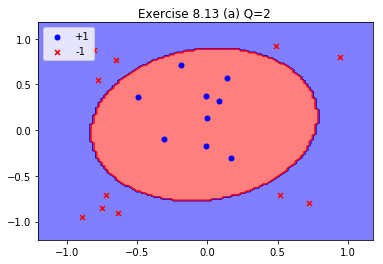

In [6]:
def plot_813(df, cls, tit):
    xsp1 = df.loc[df['y']==1]['x1'].values
    ysp1 = df.loc[df['y']==1]['x2'].values
    xsm1 = df.loc[df['y']==-1]['x1'].values
    ysm1 = df.loc[df['y']==-1]['x2'].values    
    
    x1_min, x1_max = -1.2, 1.2
    x2_min, x2_max = -1.2, 1.2
    xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
    myplot.plot_decision_boundaries(xx1, xx2, 2, cls, alpha=0.5)

    myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
                   colors = ['b', 'r'], markers = ['o', 'x'], labels = ['+1', '-1'], 
                   title = tit, yscale = None, ylb = -1, yub = 1,
                   xlb = 0, xub = 1, xlabel = None, ylabel = None,
                   legends = ['+1', '-1'], legendx = None, legendy = None, marker_sizes=[25, 25])

def gen_data_813():
    datap = np.array([[-0.494, 0.363], [-0.311, -0.101], [-0.0064, 0.374], 
                      [-0.0089, -0.173], [0.0014, 0.138], [-0.189, 0.718],
                     [0.085, 0.32208], [0.171, -0.302], [0.142, 0.568]])
    datan = np.array([[0.491, 0.920], [-0.892, -0.946], [-0.721, -0.710],
                     [0.519, -0.715], [-0.775, 0.551], [-0.646, 0.773],
                     [-0.803, 0.878], [0.944, 0.801], [0.724, -0.795],
                     [-0.748, -0.853], [-0.635, -0.905]])
    p_df = pd.DataFrame(datap, columns=['x1', 'x2'])
    p_df['y'] = 1
    n_df = pd.DataFrame(datan, columns=['x1', 'x2'])
    n_df['y'] = -1
    df = pd.concat([p_df, n_df])
    return df

df = gen_data_813()

X_train = df[['x1', 'x2']].values
y_train = df['y'].values

reg_type = None
lambda_t = 0
Q = 2
lr2 = lm.LinearRegression('pesudo_inv', reg_type, reg_param = lambda_t, 
                          poly_degree = Q, to_classify=True)
lr2.fit(X_train, y_train)

Q = 3
lr3 = lm.LinearRegression('pesudo_inv', reg_type, reg_param = lambda_t, 
                          poly_degree = Q, to_classify=True)
lr3.fit(X_train, y_train)

plot_813(df, lr2, "Exercise 8.13 (a) Q=2 ")

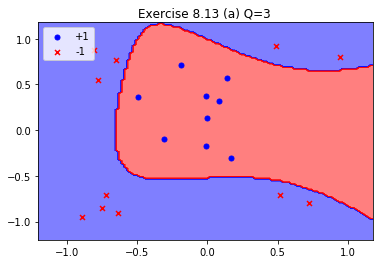

In [7]:
plot_813(df, lr3, "Exercise 8.13 (a) Q=3 ")

#### Problem 8.13 (b) 

The fit with $Q=3$ seems to have overfitted. It's more complicated and seems to fit the on the far right too much. 

#### Problem 8.13 (c)

After adding regularization, we find that the $Q=3$ fit becomes much closer to $Q=2$ fit.

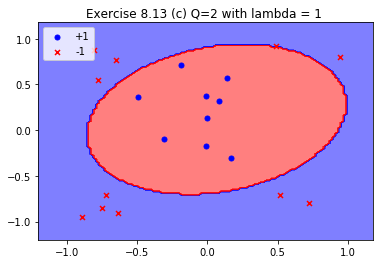

In [8]:
reg_type = None
lambda_t = 1
Q = 2
lr2 = lm.LinearRegression('pesudo_inv', reg_type, reg_param = lambda_t, 
                          poly_degree = Q, to_classify=True)
lr2.fit(X_train, y_train)

Q = 3
lr3 = lm.LinearRegression('pesudo_inv', reg_type, reg_param = lambda_t, 
                          poly_degree = Q, to_classify=True)
lr3.fit(X_train, y_train)

plot_813(df, lr2, "Exercise 8.13 (c) Q=2 with lambda = 1 ")

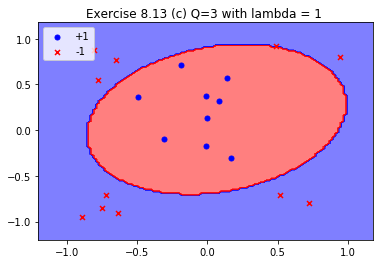

In [9]:
plot_813(df, lr2, "Exercise 8.13 (c) Q=3 with lambda = 1 ")

#### Problem 8.14

* (a) Let $z_n = \begin{bmatrix}\Phi_{n1} \\ \dots \\ \Phi_{n\tilde{d}}\end{bmatrix}$, where $\tilde{d}$ is the dimension in feature space $\mathcal{Z}$. So we have $\tilde{w}^* = \sum^N_{n=1}\beta^*_nz_n = Z^T\beta*$ using representor theorem. 

Where $Z=\begin{bmatrix}z^T_1 \\ \dots \\ z^T_N\end{bmatrix}$, and $K=ZZ^T$, where $K_{ij}=K(x_i,x_j) = \Phi^T(x_i)\Phi(x_j) = z^T_iz_j$.

Let  $\tilde{w} = Z^T\beta$, we now have: 

\begin{align*}
E_{aug}(\tilde{w}) &= \|Z\tilde{w} - y\|^2 + \lambda \tilde{w}^T\tilde{w}\\
&= \|ZZ^T\beta - y\|^2 + \lambda (Z^T\beta)^T(Z^T\beta)\\
&= \|K\beta - y\|^2 + \lambda \beta^TK\beta\\
\end{align*}

So $\beta^*$ minimizes $E(\beta) = \|K\beta - y\|^2 + \lambda \beta^TK\beta$

* (b) $K=ZZ^T$, it's clear that it's symmetric. Or we have $K(x_i,x_j) = \Phi^T(x_i)\Phi(x_j) = \Phi^T(x_j)\Phi(x_i) = K(x_j, x_i)$

* (c) Take derivative of $E(\beta)$ w.r.t. $\beta$ and set it to zero, we have

\begin{align*}
\frac{\partial{E(\beta)}}{\partial{\beta}} &= 2K^TK\beta - 2K^Ty + \lambda (K+K^T)\beta\\
&= 2(K^TK+\lambda K^T)\beta - 2K^Ty\\
&= 2K^T\left((K+\lambda I)\beta - y\right)\\
&= 0 \\
\end{align*}

The solution is $\beta^* = (K + \lambda I)^{-1}y$

* (d) The final hypothesis is thus

\begin{align*}
g(x) &= \text{sign}\left((\tilde{w}^*)^Tz\right)\\
&= \text{sign}\left((Z^T\beta^*)^Tz\right)\\
&= \text{sign}\left((\beta^*)^TZz\right)\\
&= \text{sign}\left((\beta^*)^T\begin{bmatrix}z^T_1 \\ \dots \\ z^T_N\end{bmatrix}z\right)\\
&= \text{sign}\left((\beta^*)^T\begin{bmatrix}z^T_1z \\ \dots \\ z^T_Nz\end{bmatrix}\right)\\
&= \text{sign}\left((\beta^*)^T\begin{bmatrix}K(x_1,x) \\ \dots \\ K(x_N,x)\end{bmatrix}\right)\\
&= \text{sign}\left(\sum^N_{n=1}\beta^*_nK(x_n,x)\right)\\
\end{align*}

#### Problem 8.15

* (a) This is similar to problem 5.2 (a), we copy the answer here:

$E_{in}(g_i)$ has to be non-increasing in $i$ because for $p \lt q$, $g_p \in \mathcal{H}_p$ and $g_p \in \mathcal{H}_q$ because $\mathcal{H}_p \subset \mathcal{H}_q$. So $E_{in}(g_q) \le E_{in}(g_p)$, otherwise we can always let $g_q = g_p$ and achieve the same performance as $E_{in}(g_p)$. 

As we increase $m$, the hypotheses are increasing as well, so the complexity penalty $\Omega(\mathcal{H}_m)$ shall be non-decreasing.

As we increase $m$, the number of hypotheses increases, so the growth function $m_{\mathcal{H}_i}$ is increasing as well. 
The VC bound is $E_{out}(g) \le E_{in}(g) + \sqrt{\frac{8}{N}\ln\frac{4m_{\mathcal{H}_i}(2N)}{\delta}}$

For a given number $N$ points, the first term is non-increasing, the second term is non-decreasing, so the VC bound can be a mixed situation.

* (b) The target function is more complex, the larger hypothesis sets will have larger probability. 
 
* (c)  According to VC generalization bound theorem 2.5, we have  $E_{out}(g) \le E_{in}(g) + \sqrt{\frac{8}{N}\ln \frac{4m_{\mathcal{H}}(2N)}{\delta}}$ with probability of at least $1-\delta$, thus with at most a probability of $\delta$, we have $P\left[|E_{out}(g)-E_{in}(g)| \gt \epsilon \right] \le \delta$, where $\epsilon = \sqrt{\frac{8}{N}\ln \frac{4m_{\mathcal{H}}(2N)}{\delta}}$, solve for $\delta$ we have $P\left[|E_{out}(g)-E_{in}(g)| \gt \epsilon \right] \le 4m_{\mathcal{H}}(2N)e^{-\frac{\epsilon^2N}{8}}$, this applies to all $g$ in SRM, let $\mathcal{H}_i$ be the set where we have maximum error, i.e. $|E_{out}(g_i)-E_{in}(g_i)| \ge |E_{out}(g_k)-E_{in}(g_k)|$ for $k\ne i$. so we have $P\left[\max_{g\in \mathcal{H}_i}|E_{out}(g)-E_{in}(g)| \gt \epsilon \right] \le 4m_{\mathcal{H}_i}(2N)e^{-\frac{\epsilon^2N}{8}}$

Now: 

\begin{align*}
P\left[|E_{in}(g_i) - E_{out}(g_i)| \gt \epsilon | g^* = g_m\right] &= \frac{P\left[|E_{in}(g_i) - E_{out}(g_i)| \gt \epsilon \cap  g^* = g_m\right]}{P(g^* = g_m)}\\
&= \frac{P[g^* = g_m| \;|E_{in}(g_i) - E_{out}(g_i)| \gt \epsilon]P\left[|E_{in}(g_i) - E_{out}(g_i)| \gt \epsilon\right]}{p_m}\\
&\le \frac{P\left[|E_{in}(g_i) - E_{out}(g_i)| \gt \epsilon\right]}{p_m}\\
&= \frac{4m_{\mathcal{H}_i}(2N)e^{-\frac{\epsilon^2N}{8}}}{p_m}\\
\end{align*}

Since $\mathcal{H}_i$ has the largest error, set $i=m$, we have

$P\left[|E_{in}(g_m) - E_{out}(g_m)| \gt \epsilon | g^* = g_m\right] \le  \frac{4m_{\mathcal{H}_m}(2N)e^{-\frac{\epsilon^2N}{8}}}{p_m}$

If we use SRM and end up with $g_m$ then the generalization bound is a factor $\frac{1}{p_m}$ worse than the bound we would have gotten if we simply started with $\mathcal{H}_m$.


#### Problem 8.16

We can pose the soft order constraints $\{\mathcal{H}_C\}_{C>0}$ within the SRM framework.
In the soft order constraint, we are optimizing the problem:

$\min_{w}E_{in}(w)$ subject to $w^Tw \le C$, this is equivalent to minimizing $E_{in}$ over $\mathcal{H}(C) = \{h\in\mathcal{H}, w^Tw \le C\}$.

If $C_1 < C_2$, then we have $\mathcal{H}(C_1) \subset \mathcal{H}(C_2)$

On the other hand, if we use regularization parameters, we are optimizing:

$\min_{w}E_{in}(w) + \lambda w^Tw $, which can't be posed as SRM framework.




#### Problem 8.17

* (a) VC dimension is the largest value of $N$ for which $m_{\mathcal{H}}(N) = 2^N$. If the number of points $N> d_{VC}(\mathcal{H}_{m+1})$, then it's possible that $E_{in}(\mathcal{H}_m) < E_{in}(\mathcal{H}_{m+1})$ since the hypotheses in the two sets can be totally different yet still satisfy the constraint on the VC dimension. If the target function comes from $\mathcal{H}_m$, it's possible that it has a smaller in-sample error.

* (b) From problem 8.15, suppose that $\mathcal{H}_i$ is the set with maximum error, and $g^* = g_m$, for any set $k$, we have 

\begin{align*}
P\left[|E_{in}(g_k) - E_{out}(g_k)| \gt \epsilon | g^* = g_m\right] &\le P\left[|E_{in}(g_i) - E_{out}(g_i)| \gt \epsilon | g^* = g_m\right] \\
&\le \frac{4m_{\mathcal{H}_i}(2N)e^{-\frac{\epsilon^2N}{8}}}{p_m}\\
\end{align*}

So 

\begin{align*}
P[|E_{in}(g_k) - E_{out}(g_k)| \gt \epsilon] &= \sum_n P[g^* = g_n]P\left[|E_{in}(g_k) - E_{out}(g_k)| \gt \epsilon | g^* = g_n\right] \\
&\le \sum_n 4m_{\mathcal{H}_i}(2N)e^{-\frac{\epsilon^2N}{8}}\\
&= 4Mm_{\mathcal{H}_i}(2N)e^{-\frac{\epsilon^2N}{8}}\\
\end{align*}

and apply $m_{\mathcal{H}}(N) \le N^{d_{VC}}+1$, let $\delta = 4Mm_{\mathcal{H}_i}(2N)e^{-\frac{\epsilon^2N}{8}}$, we have $\epsilon = \sqrt{\frac{8}{N}\ln \frac{4Mm_{\mathcal{H}_i}(2N)}{\delta}}$

So we have the generalization error bounded by

\begin{align*}
E_{out}(g_k) &\le E_{in}(g_k) + \epsilon \\
&= E_{in}(g_k) + \sqrt{\frac{8}{N}\ln \frac{4Mm_{\mathcal{H}_i}(2N)}{\delta}}\\
&= E_{in}(g_k) + \sqrt{\frac{8}{N}\ln \frac{4M\left((2N)^{d_{VC}(\mathcal{H}_i)}+1\right)}{\delta}}\\
&< E_{in}(g_k) + \sqrt{\frac{8}{N}\ln \frac{4M\left((2N)^{d_{VC}(\mathcal{H}_M)}+1\right)}{\delta}}\\
\end{align*}

#### Problem 8.18

* (a) We can't use $m$ on the VC-bound, because before we run the learning algorithm, we don't know when will we stop, i.e. what is the $m$ value. So we don't have just $m$ hypotheses when we start.

* (b) for $m=1,\dots$, we have $\mathcal{H}_m \subset \mathcal{H}_{m+1}$, so we can have $\mathcal{H}_1, \dots, \mathcal{H}_m, \dots$, where $\mathcal{H}_m = \{h_1, h_2, \dots, h_m\}$ as in SRM structure.

As we move along $h_1,h_2,\dots, $, we are effectively computing the $E_{in}$ for each $\mathcal{H}_m$. For example, 

$g_1 = \text{argmin}_{h\in \mathcal{H}_1}E_{in}(h) = h_1$

$g_2 = \text{argmin}_{h\in \mathcal{H}_2}E_{in}(h) = \text{argmin}_h (E_{in}(h_1), E_{in}(h_2))$

$g_m = \text{argmin}_{h\in \mathcal{H}_m}E_{in}(h) = \text{argmin}_h (E_{in}(h_1), \dots, E_{in}(h_m))$

If we stop at $h_m$, then we know that $g_m = h_m$ and $g^* = \text{argmin}_{g_m}E_{in}(g_m) = h_m$.

This is the SRM process.

* (c) The SRM bound we derived in previous problems 8.15 is applicable regardless of the number of hypotheses sets. So we can use the bound derived in problem 8.15 (c) here.  However, since $d_{VC}(\mathcal{H}) = \infty$, the bound is only useful when the VC dimension $d_{VC}(\mathcal{H}_m) < \infty$.